In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
img = cv2.imread('./test_images/kohli2.jpg')
img.shape

(259, 194, 3)

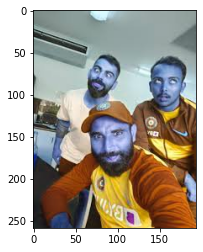

In [111]:
plt.imshow(img)

In [112]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(259, 194)

In [113]:
gray

array([[135, 136, 136, ..., 157, 155, 155],
       [135, 136, 136, ..., 157, 155, 155],
       [135, 135, 136, ..., 157, 155, 155],
       ...,
       [ 37,  37,  37, ...,  99,  70,  70],
       [ 37,  37,  37, ..., 100,  91,  91],
       [ 37,  37,  37, ...,  87, 101, 101]], dtype=uint8)

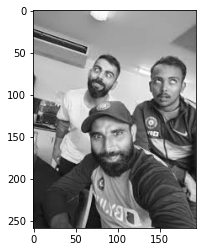

In [114]:
plt.imshow(gray, cmap='gray')

In [115]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces # array of faces, with x,y,w,h

array([[133,  64,  50,  50],
       [ 63, 130,  53,  53]], dtype=int32)

In [116]:
(x,y,w,h) = faces[0]
x,y,w,h

(133, 64, 50, 50)

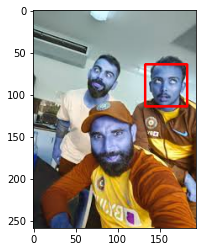

In [117]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

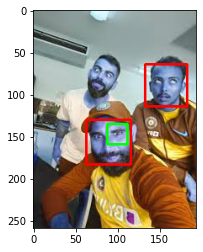

In [126]:
cv2.destroyAllWindows()
# for each face, detect eyes
for (x,y,w,h) in faces: 
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

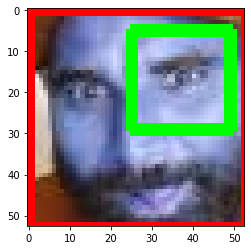

In [127]:
plt.imshow(roi_color, cmap='gray')

In [128]:
#function to return cropped faces from an image
#returns nothing if no 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    allfaces = []
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # print(faces)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            allfaces.append(roi_color)
    return allfaces

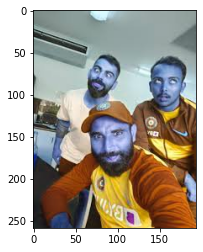

In [129]:
original_image = cv2.imread('./test_images/kohli2.jpg')
plt.imshow(original_image)

In [130]:
cropped_images = get_cropped_image_if_2_eyes('./test_images/kohli2.jpg')
print(len(cropped_images))
for img in cropped_images:
       plt.imshow(img)

0


In [131]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [132]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [133]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/cropped',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [134]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [136]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    if celebrity_name == 'cropped':
        continue
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        #print(entry.path)
        last = entry.path.split('/')[-1]
        if last != '.DS_Store':
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            
        for imgg in roi_color:
            if imgg is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 

                cv2.imwrite(cropped_file_path, imgg)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
